In [1]:
import os
import sys
import copy
import numpy
import modules.io as io
import modules.plot_func as pltt
import modules.traj_analysis as tran
import modules.edge_detector as edged
import modules.helper_func_class as misc
import modules.traj_to_step_matrix as tstep
import modules.process_mouse_trials_lib as plib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# 2-target Probe 2

d:\Dropbox\p\uottawa\data\animal_trajectories\mouse_track\modules\traj_to_step_matrix.py:407: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return networkx.adjacency_matrix(G.to_directed()).nonzero()


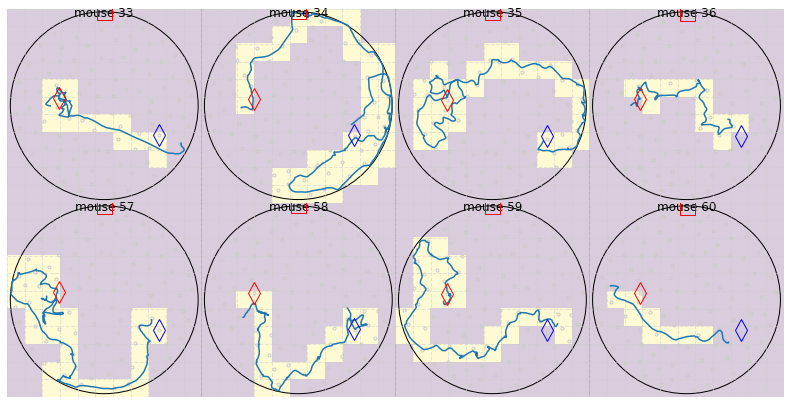

In [2]:

config_param           = dict(mouse_part           = ['nose']                           ,
                              L                    = [11]                               ,
                              prob_calc            = [misc.ProbabilityType.independent] ,
                              start_from_zero      = [False]                            ,
                              n_stages             = []                                 ,
                              stop_at_food         = [True]                             ,
                              use_latest_target    = [True]                             )


filename_expr          = 'mpos_*Probe2_*'
keep_between_targets   = True
stop_at_food           = config_param['stop_at_food']
hole_horizon           = 10.0 # cm
time_delay_after_food  = 1.0 # sec
mouse_traj_dir         = r'./experiments/two_target_no_cues/mouse_*'
input_tracks           = io.load_trial_file(mouse_traj_dir,file_name_expr=filename_expr,align_to_top=True,fix_nan=True,sort_by_trial=True,return_group_by_keys=False,remove_after_food=False)
if keep_between_targets:
    input_tracks       = tran.keep_path_between_targets(input_tracks,return_t_in_targets=False,hole_horizon=hole_horizon,time_delay_after_food=time_delay_after_food,copy_tracks=True)
elif stop_at_food:
    input_tracks       = tran.remove_path_after_food(input_tracks,force_main_target=False,return_t_to_food=False,hole_horizon=hole_horizon,time_delay_after_food=time_delay_after_food,copy_tracks=True)
use_extra_trials       = [True]
align_method           = ['entrance'] # 'entrance' or 'target'

n_trial_max              = numpy.unique([ plib.trial_to_number(tr.trial) for tr in input_tracks ]).size #n_trials_to_use if n_trials_to_use else max([ int(plib.trial_to_number(tr.trial)) for tr in input_tracks ])
config_param['n_stages'] = [n_trial_max]
config = tstep.get_step_prob_input_param_config_list(mouse_part        = config_param['mouse_part']       ,
                                                     n_stages          = config_param['n_stages']         ,
                                                     L_lattice         = config_param['L']                ,
                                                     prob_calc         = config_param['prob_calc']        ,
                                                     start_from_zero   = config_param['start_from_zero']  ,
                                                     use_extra_trials  = use_extra_trials                 ,
                                                     stop_at_food      = config_param['stop_at_food']     ,
                                                     align_method      = align_method                     ,
                                                     use_latest_target = config_param['use_latest_target'])

param_struct   = tstep.get_calc_step_probability_param_struct(**config[0])
step_prob_data = tstep.calc_step_probability(param_struct=param_struct,tracks=input_tracks,return_as_file_struct=True)

fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8))

for k,(track,P) in enumerate(zip(input_tracks,step_prob_data.P_specific[0])):
    G = numpy.zeros((param_struct.L_lattice,param_struct.L_lattice))
    G[numpy.unravel_index(numpy.unique(P.nonzero()[0]),shape=(param_struct.L_lattice,param_struct.L_lattice),order='F')] = 1

    aax = ax[numpy.unravel_index(k,ax.shape)]
    pltt.plot_arena_sketch(track,showAllEntrances=False,arenaPicture=False,showHoles=True,ax=aax)
    pltt.plot_arena_grid(aax,G,track=track,line_color=(0.8,0.8,0.8,0.5),show_grid_lines=True,grid_alpha=0.2)
    pltt.plot_mouse_trajectory(aax,track,mouse_part='nose',show_reverse_target=False,show_alt_target=True)
    aax.autoscale()
    aax.set_aspect('equal','box')
    aax.set_title('mouse %s'%track.mouse_number)

pltt.tight_arena_panels(ax,set_axis_off=True,adjust_title_position=True,dy0=-0.2)

plt.show()

In [3]:
print(step_prob_data.r_target_trial,
      step_prob_data.r_target_alt_trial,
      step_prob_data.r_target_rev_trial,
      step_prob_data.r_target_revalt_trial)

[array([5., 6.])] [array([8., 7.])] [array([8., 7.])] [array([2., 3.])]


# static target Rotated Probe (180deg)

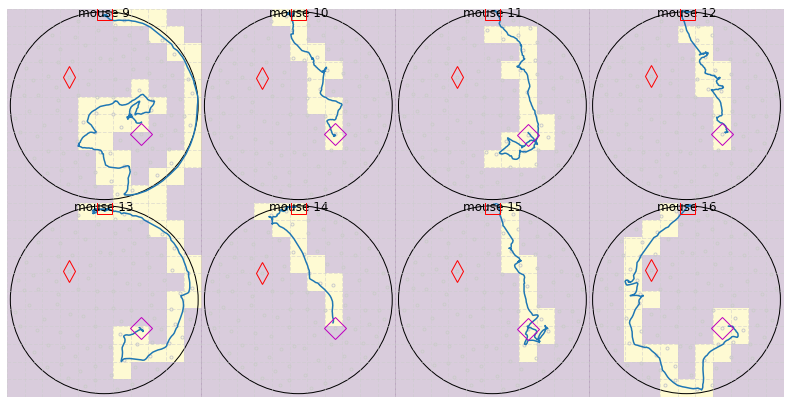

In [4]:

config_param           = dict(mouse_part           = ['nose']                           ,
                              L                    = [11]                               ,
                              prob_calc            = [misc.ProbabilityType.independent] ,
                              start_from_zero      = [False]                            ,
                              n_stages             = []                                 ,
                              stop_at_food         = [True]                             ,
                              use_latest_target    = [False]                            ,
                              use_reverse_target   = [True]                             )

use_extra_trials       = [True]
align_method           = ['entrance'] # 'entrance' or 'target'


mouse_traj_dir     = r'./experiments/relative_target/mouse_*'
out_dir            = r'step_prob_matrices/relative_target_R180'
filename_expr      = 'mpos_*_R180_1*'

stop_at_food           = True
hole_horizon           = 5.0 # cm
# None for others
# 5 cm for mouse 16 and 14
get_hole_horiz        = lambda tr: hole_horizon if int(tr.mouse_number) in [14,16] else None

time_delay_after_food  = 1.0 # sec

#n_trials_to_use   = 14
input_tracks       = io.load_trial_file(mouse_traj_dir,file_name_expr=filename_expr,load_only_training_sessions_relative_target=False,skip_15_relative_target=True,use_extra_trials_relative_target=True,sort_by_trial=True,fix_nan=True,remove_after_food=False,group_by='none')#,max_trial_number=n_trials_to_use)
if stop_at_food:
    input_tracks   = io.group_track_list([ tran.remove_path_after_food(tr,r_target=tr.r_target_reverse,return_t_to_food=False,force_main_target=False,hole_horizon=get_hole_horiz(tr),time_delay_after_food=0.0) for tr in input_tracks ],group_by='trial',return_group_keys=False)[0]


n_trial_max              = numpy.unique([ plib.trial_to_number(tr.trial) for tr in input_tracks ]).size #n_trials_to_use if n_trials_to_use else max([ int(plib.trial_to_number(tr.trial)) for tr in input_tracks ])
config_param['n_stages'] = [n_trial_max]
config = tstep.get_step_prob_input_param_config_list(mouse_part         = config_param['mouse_part']        ,
                                                     n_stages           = config_param['n_stages']          ,
                                                     L_lattice          = config_param['L']                 ,
                                                     prob_calc          = config_param['prob_calc']         ,
                                                     start_from_zero    = config_param['start_from_zero']   ,
                                                     use_extra_trials   = use_extra_trials                  ,
                                                     stop_at_food       = config_param['stop_at_food']      ,
                                                     align_method       = align_method                      ,
                                                     use_latest_target  = config_param['use_latest_target'] ,
                                                     use_reverse_target = config_param['use_reverse_target'])

param_struct   = tstep.get_calc_step_probability_param_struct(**config[0])
step_prob_data = tstep.calc_step_probability(param_struct=param_struct,tracks=input_tracks,return_as_file_struct=True)

fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8))

for k,(track,P) in enumerate(zip(input_tracks,step_prob_data.P_specific[0])):
    G = numpy.zeros((param_struct.L_lattice,param_struct.L_lattice))
    G[numpy.unravel_index(numpy.unique(P.nonzero()[0]),shape=(param_struct.L_lattice,param_struct.L_lattice),order='F')] = 1

    aax = ax[numpy.unravel_index(k,ax.shape)]
    pltt.plot_arena_sketch(track,showAllEntrances=False,arenaPicture=False,showHoles=True,ax=aax)
    pltt.plot_arena_grid(aax,G,track=track,line_color=(0.8,0.8,0.8,0.5),show_grid_lines=True,grid_alpha=0.2)
    pltt.plot_mouse_trajectory(aax,track,mouse_part='nose',show_reverse_target=True,show_target=True)
    aax.autoscale()
    aax.set_aspect('equal','box')
    aax.set_title('mouse %s'%track.mouse_number)

pltt.tight_arena_panels(ax,set_axis_off=True,adjust_title_position=True,dy0=-0.2)

plt.show()

In [5]:
print(step_prob_data.r_target_trial,
      step_prob_data.r_target_alt_trial,
      step_prob_data.r_target_rev_trial,
      step_prob_data.r_target_revalt_trial)

[array([7., 7.])] [array([nan, nan])] [array([7., 7.])] [array([nan, nan])]


# static target 90 Rotated Probe (04Nov2022)

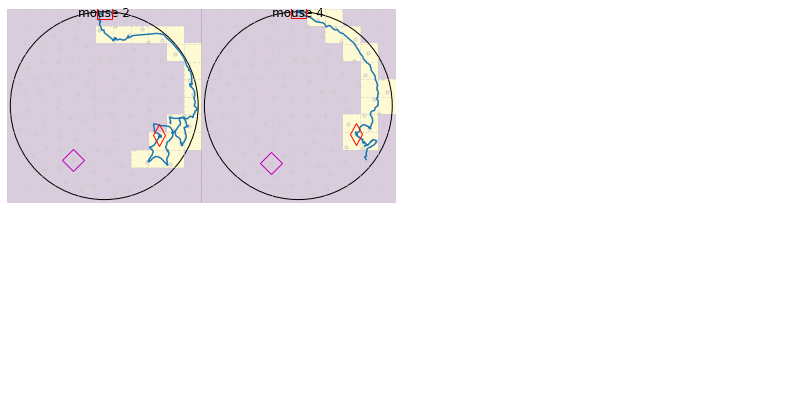

In [4]:

config_param           = dict(mouse_part           = ['nose']                           ,
                              L                    = [11]                               ,
                              prob_calc            = [misc.ProbabilityType.independent] ,
                              start_from_zero      = [False]                            ,
                              n_stages             = []                                 ,
                              stop_at_food         = [True]                             ,
                              use_latest_target    = [False]                            ,
                              use_reverse_target   = [True]                             )

use_extra_trials       = [True]
align_method           = ['entrance'] # 'entrance' or 'target'


mouse_traj_dir     = r'./experiments/relative_target_90deg/mouse_*'
out_dir            = r'step_prob_matrices/relative_target_R90'
filename_expr      = 'mpos_*_R90_*'

stop_at_food           = True
hole_horizon           = 5.0 # cm
# None for others
# 5 cm for mouse 16 and 14
get_hole_horiz        = lambda tr: hole_horizon if int(tr.mouse_number) in [14,16] else None

time_delay_after_food  = 1.0 # sec

#n_trials_to_use   = 14
input_tracks       = io.load_trial_file(mouse_traj_dir,file_name_expr=filename_expr,load_only_training_sessions_relative_target=False,skip_15_relative_target=True,use_extra_trials_relative_target=True,sort_by_trial=True,fix_nan=True,remove_after_food=False,group_by='none')#,max_trial_number=n_trials_to_use)
if stop_at_food:
    input_tracks   = tran.remove_path_after_food(input_tracks,return_t_to_food=False,force_main_target=False,hole_horizon=hole_horizon,time_delay_after_food=3.0)


n_trial_max              = numpy.unique([ plib.trial_to_number(tr.trial) for tr in input_tracks ]).size #n_trials_to_use if n_trials_to_use else max([ int(plib.trial_to_number(tr.trial)) for tr in input_tracks ])
config_param['n_stages'] = [n_trial_max]
config = tstep.get_step_prob_input_param_config_list(mouse_part         = config_param['mouse_part']        ,
                                                     n_stages           = config_param['n_stages']          ,
                                                     L_lattice          = config_param['L']                 ,
                                                     prob_calc          = config_param['prob_calc']         ,
                                                     start_from_zero    = config_param['start_from_zero']   ,
                                                     use_extra_trials   = use_extra_trials                  ,
                                                     stop_at_food       = config_param['stop_at_food']      ,
                                                     align_method       = align_method                      ,
                                                     use_latest_target  = config_param['use_latest_target'] ,
                                                     use_reverse_target = config_param['use_reverse_target'])

param_struct   = tstep.get_calc_step_probability_param_struct(**config[0])
step_prob_data = tstep.calc_step_probability(param_struct=param_struct,tracks=input_tracks,return_as_file_struct=True)

fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8))

for k,(track,P) in enumerate(zip(input_tracks,step_prob_data.P_specific[0])):
    G = numpy.zeros((param_struct.L_lattice,param_struct.L_lattice))
    G[numpy.unravel_index(numpy.unique(P.nonzero()[0]),shape=(param_struct.L_lattice,param_struct.L_lattice),order='F')] = 1

    aax = ax[numpy.unravel_index(k,ax.shape)]
    pltt.plot_arena_sketch(track,showAllEntrances=False,arenaPicture=False,showHoles=True,ax=aax)
    pltt.plot_arena_grid(aax,G,track=track,line_color=(0.8,0.8,0.8,0.5),show_grid_lines=True,grid_alpha=0.2)
    pltt.plot_mouse_trajectory(aax,track,mouse_part='nose',show_reverse_target=True,show_target=True)
    aax.autoscale()
    aax.set_aspect('equal','box')
    aax.set_title('mouse %s'%track.mouse_number)

pltt.tight_arena_panels(ax,set_axis_off=True,adjust_title_position=True,dy0=-0.2)

plt.show()

# 2-targets Rotated Probe 2 (180deg)

d:\Dropbox\p\uottawa\data\animal_trajectories\mouse_track\modules\traj_to_step_matrix.py:430: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return networkx.adjacency_matrix(G.to_directed()).nonzero()
d:\Dropbox\p\uottawa\data\animal_trajectories\mouse_track\modules\traj_to_step_matrix.py:306: UserWarning:   ****  MORE THAN 1 TARGET FOUND ****
  warnings.warn('  ****  MORE THAN 1 TARGET FOUND ****')
d:\Dropbox\p\uottawa\data\animal_trajectories\mouse_track\modules\traj_to_step_matrix.py:308: UserWarning:   ****  MORE THAN 1 TARGET ALT FOUND ****
  warnings.warn('  ****  MORE THAN 1 TARGET ALT FOUND ****')
d:\Dropbox\p\uottawa\data\animal_trajectories\mouse_track\modules\traj_to_step_matrix.py:310: UserWarning:   ****  MORE THAN 1 TARGET REVERSE FOUND ****
  warnings.warn('  ****  MORE THAN 1 TARGET REVERSE FOUND ****')
d:\Dropbox\p\uottawa\data\animal_trajectories\mouse_track\modules\traj_to_step_matrix.py:312: UserWarning:   ***

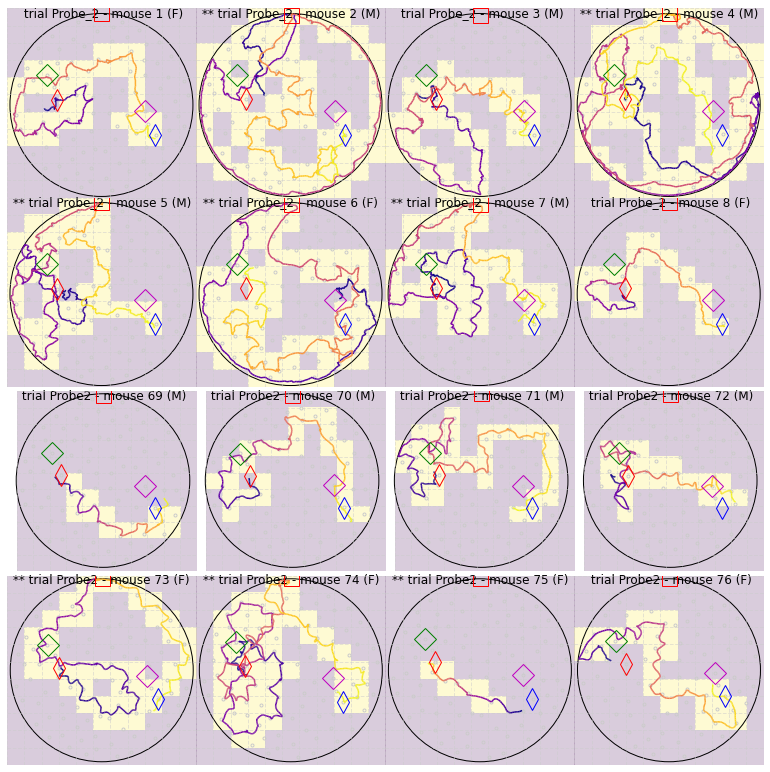

In [11]:

config_param           = dict(mouse_part           = ['nose']                           ,
                              L                    = [11]                               ,
                              prob_calc            = [misc.ProbabilityType.independent] ,
                              start_from_zero      = [False]                            ,
                              n_stages             = []                                 ,
                              stop_at_food         = [True]                             ,
                              use_latest_target    = [True]                             ,
                              use_reverse_target   = [False]                            )


filename_expr1         = 'mpos_*Probe2_*'
filename_expr2         = 'mpos_*Probe_2_*'
keep_between_targets   = True
stop_at_food           = config_param['stop_at_food']
hole_horizon           = 10.0 # cm
time_delay_after_food  = 1.0 # sec
mouse_traj_dir         = [r'./experiments/two_targets_rot/mouse_*'       ,
                          r'./experiments/two_targets_rot_fem/mouse_*'   ,
                          r'./experiments/two_targets_rot_mixsex/mouse_*']
input_tracks           = misc.flatten_list([
                                        io.load_trial_file(mouse_traj_dir,file_name_expr=filename_expr1,align_to_top=True,fix_nan=True,sort_by_trial=True,return_group_by_keys=False,remove_after_food=False),
                                        io.load_trial_file(mouse_traj_dir,file_name_expr=filename_expr2,align_to_top=True,fix_nan=True,sort_by_trial=True,return_group_by_keys=False,remove_after_food=False),
                                    ], only_lists=True, return_list=True)
if keep_between_targets:
    input_tracks       = tran.keep_path_between_targets(input_tracks,return_t_in_targets=False,hole_horizon=hole_horizon,time_delay_after_food=time_delay_after_food,copy_tracks=True)
elif stop_at_food:
    input_tracks       = tran.remove_path_after_food(input_tracks,force_main_target=False,return_t_to_food=False,hole_horizon=hole_horizon,time_delay_after_food=time_delay_after_food,copy_tracks=True)

input_tracks           = io.group_track_list(input_tracks,group_by='trial',return_group_keys=False)[0]

use_extra_trials       = [True]
align_method           = ['entrance'] # 'entrance' or 'target'
use_latest_target      = config_param['use_latest_target']
use_reverse_target     = config_param['use_reverse_target']

n_trial_max              = numpy.unique([ plib.trial_to_number(tr.trial) for tr in input_tracks ]).size #n_trials_to_use if n_trials_to_use else max([ int(plib.trial_to_number(tr.trial)) for tr in input_tracks ])
config_param['n_stages'] = [n_trial_max]
config = tstep.get_step_prob_input_param_config_list(mouse_part         = config_param['mouse_part']        ,
                                                     n_stages           = config_param['n_stages']          ,
                                                     L_lattice          = config_param['L']                 ,
                                                     prob_calc          = config_param['prob_calc']         ,
                                                     start_from_zero    = config_param['start_from_zero']   ,
                                                     use_extra_trials   = use_extra_trials                  ,
                                                     stop_at_food       = config_param['stop_at_food']      ,
                                                     align_method       = align_method                      ,
                                                     use_latest_target  = config_param['use_latest_target'] ,
                                                     use_reverse_target = config_param['use_reverse_target'])

param_struct   = tstep.get_calc_step_probability_param_struct(**config[0])
step_prob_data = tstep.calc_step_probability(param_struct=param_struct,tracks=input_tracks,return_as_file_struct=True)

fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(26,16))

for k,(track,P) in enumerate(zip(input_tracks,step_prob_data.P_specific[0])):
    G = numpy.zeros((param_struct.L_lattice,param_struct.L_lattice))
    G[numpy.unravel_index(numpy.unique(P.nonzero()[0]),shape=(param_struct.L_lattice,param_struct.L_lattice),order='F')] = 1

    aax = ax[numpy.unravel_index(k,ax.shape)]
    pltt.plot_arena_sketch(track,showAllEntrances=False,arenaPicture=False,showHoles=True,ax=aax)
    pltt.plot_arena_grid(aax,G,track=track,line_color=(0.8,0.8,0.8,0.5),show_grid_lines=True,grid_alpha=0.2)
    pltt.plot_mouse_trajectory(aax,track,mouse_part='nose',show_reverse_alt_target=True,show_reverse_target=True,show_alt_target=True,line_gradient_variable='time',show_colorbar=False)
    aax.autoscale()
    aax.set_aspect('equal','box')
    token = ''
    if int(track.mouse_number) in [2,4,5,6,7,73,74,75]: # these mice are out of the step map calc for the paper
        token = '**'
    aax.set_title(f'{token} trial {track.trial} - mouse {track.mouse_number} ({track.mouse_gender})')

pltt.tight_arena_panels(ax,set_axis_off=True,adjust_title_position=True,dy0=-0.2)


plt.show()

 ... save  figs/paper/2targets/twotargets_REL_trajectories.png


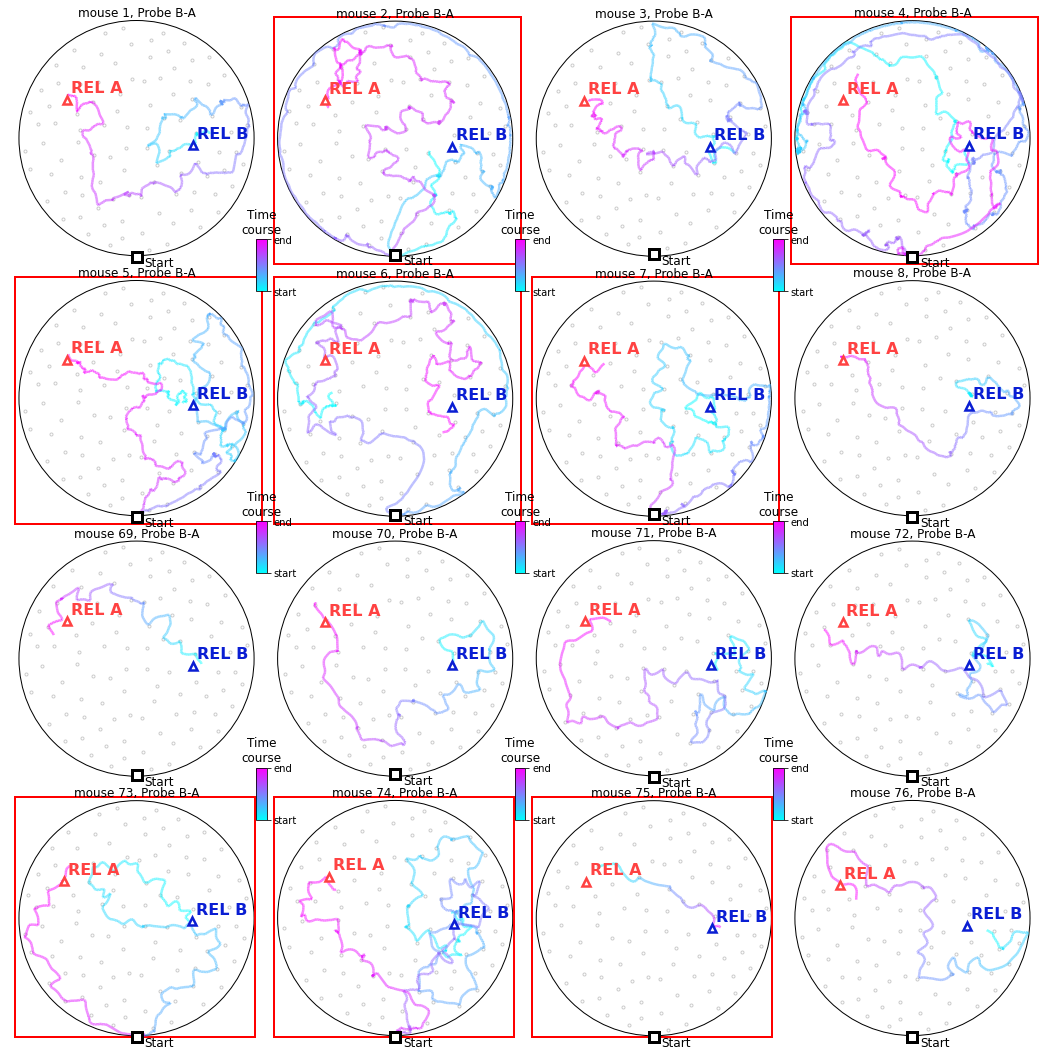

In [76]:
import sys
del sys.modules['modules.helper_func_class']
del sys.modules['modules.plot_func']
del misc
del pltt
import modules.helper_func_class as misc
import modules.plot_func as pltt

filename_expr1         = 'mpos_*Probe2_*'
filename_expr2         = 'mpos_*Probe_2_*'
keep_between_targets   = True
stop_at_food           = True
hole_horizon           = 10.0 # cm
time_delay_after_food  = 1.0 # sec
mouse_traj_dir         = [r'./experiments/two_targets_rot/mouse_*'       ,
                          r'./experiments/two_targets_rot_fem/mouse_*'   ,
                          r'./experiments/two_targets_rot_mixsex/mouse_*']
input_tracks           = misc.flatten_list([
                                        io.load_trial_file(mouse_traj_dir,file_name_expr=filename_expr1,align_to_top=True,fix_nan=True,sort_by_trial=True,return_group_by_keys=False,remove_after_food=False),
                                        io.load_trial_file(mouse_traj_dir,file_name_expr=filename_expr2,align_to_top=True,fix_nan=True,sort_by_trial=True,return_group_by_keys=False,remove_after_food=False),
                                    ], only_lists=True, return_list=True)
if keep_between_targets:
    input_tracks       = tran.keep_path_between_targets(input_tracks,return_t_in_targets=False,hole_horizon=hole_horizon,time_delay_after_food=time_delay_after_food,copy_tracks=True)
elif stop_at_food:
    input_tracks       = tran.remove_path_after_food(input_tracks,force_main_target=False,return_t_to_food=False,hole_horizon=hole_horizon,time_delay_after_food=time_delay_after_food,copy_tracks=True)

input_tracks           = io.group_track_list(input_tracks,group_by='trial',return_group_keys=False)[0]


color_red       = numpy.array((255, 66, 66,255))/255
color_blue      = numpy.array(( 10, 30,211,255))/255
color_orange    = pltt.get_gradient(10,'orange')[0]
traj_alpha      = 0.5
start_vec_align = (0,-1)
ax,lines,panel_ind=pltt.plot_all_tracks_2targets(input_tracks,hole_horizon,time_delay_after_food,
                                       traj1Args=dict(color                  = plt.get_cmap('cool'),
                                                      line_gradient_variable = 'time'              ,
                                                      linewidth              = 2.5                 ,
                                                      alpha                  = traj_alpha          ,
                                                      show_colorbar          = False               ,
                                                      startArgs     = dict(marker='s',markeredgewidth=3  ,markersize=10,color='k'       ,fillstyle='full',markerfacecolor='w',label='Start',labelArgs=dict(fontsize=12,va='top'   ,ha='left',                   color='k'       ,pad=(4,0))),
                                                      targetArgs    = dict(marker='^',markeredgewidth=2.5,markersize= 8,color=color_blue,fillstyle='full',markerfacecolor='w',label='REL B',labelArgs=dict(fontsize=16,va='bottom',ha='left', fontweight='bold',color=color_blue,pad=(2,2))),
                                                      targetAltArgs = dict(marker='^',markeredgewidth=2.5,markersize= 8,color=color_red ,fillstyle='full',markerfacecolor='w',label='REL A',labelArgs=dict(fontsize=16,va='bottom',ha='left', fontweight='bold',color=color_red ,pad=(2,2)))),
                                       traj2Args=dict(color=(0,0,0),alpha=traj_alpha),start_align_vector=start_vec_align,
                                       trim_trajectories=False,return_panel_ind=True,show_arena_holes=True,
                                       probe_title='Probe B-A',fig_size=(32,22))

for j in range(ax.shape[1]-1):
    qq  = j+1 if j > 0 else 1
    dx  = 0 #if j == 0 else (qq*0.1 if i == 1 else 1.0*qq)
    if j == 1:
        dx = 0.6
    if j == 2:
        dx = 1.2
    for i in range(ax.shape[0]-1):
        kk  = i+1 if i > 0 else 1
        dy  = 1 if i == 0 else (kk*0.6 if i == 1 else 0.7*kk)
        #i,j = numpy.unravel_index(ax_ind,(4,4))
        #print(ax[k,k].get_position())
        cax = pltt._add_colorbar(ax[i,j],'cool',w_fraction_of_ax=0.03,h_fraction_of_ax=0.2,p0=(0.9-dx,-0.7/dy),minmax_tick_labels=('start','end'),title='Time\ncourse',titleArgs=dict(color='k',fontsize=12),ticklabelsArgs=dict(color='k'))


pltt.tight_arena_panels(ax,set_axis_off=True,adjust_title_position=True,dy0=-0.2)

for k,(aa,tr) in enumerate(zip(ax.flatten(),input_tracks)):
    if int(tr.mouse_number) in [2,4,5,6,7,73,74,75]:
        d = list(tr.r_arena_center + (-62.0,62.0))
        pltt.draw_rectangle(extent=misc.flatten_list([d,d],return_list=True),ax=aa,linewidth=2,edgecolor='r')

fileName = 'figs/paper/2targets/twotargets_REL_trajectories.png'
print(' ... save ', fileName)
plt.savefig( fileName ,format='png',dpi=300,facecolor=(1,1,1,1),bbox_inches='tight')

plt.show()

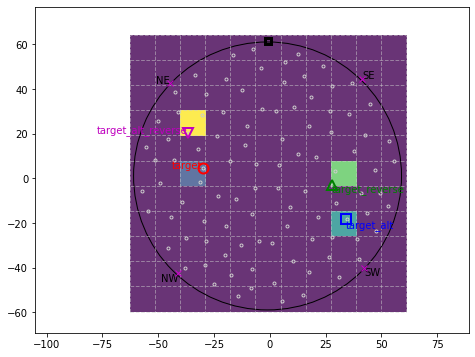

In [10]:

tr1=input_tracks[0]

T                         = tstep.get_arena_to_lattice_transform(11,step_prob_data.arena_geometry[0][0].r_center)
r_latt_target             = tstep.apply_arena_to_lattice_transform(T,tr1.r_target             ).astype(int)
r_latt_target_alt         = tstep.apply_arena_to_lattice_transform(T,tr1.r_target_alt         ).astype(int)
r_latt_target_reverse     = tstep.apply_arena_to_lattice_transform(T,tr1.r_target_reverse     ).astype(int)
r_latt_target_alt_reverse = tstep.apply_arena_to_lattice_transform(T,tr1.r_target_alt_reverse ).astype(int)

#r_latt_target             = step_prob_data.r_target_trial[0].astype(int)
r_latt_target             = step_prob_data.r_target.astype(int)
r_latt_target_alt         = step_prob_data.r_target_alt_trial[0].astype(int)
r_latt_target_reverse     = step_prob_data.r_target_rev_trial[0].astype(int)
r_latt_target_alt_reverse = step_prob_data.r_target_revalt_trial[0].astype(int)

G = numpy.zeros((11,11))
G[tuple(numpy.flip(r_latt_target              ))] = 0.25
G[tuple(numpy.flip(r_latt_target_alt          ))] = 0.5
G[tuple(numpy.flip(r_latt_target_reverse      ))] = 0.75
G[tuple(numpy.flip(r_latt_target_alt_reverse  ))] = 1.0

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
pltt.plot_arena_sketch(tr1,showAllEntrances=True,showHoles=True,showArenaCircle=True,showStart=True,ax=ax)
pltt.plot_arena_grid(ax,G,track=tr1,line_color=(0.8,0.8,0.8,0.5),show_grid_lines=True,grid_alpha=0.8)
pltt.plot_point(tr1.r_target            ,'target'            , fmt='o', color='r', markersize=10, pointArgs=dict(markeredgewidth=2), labelcolor='r')
pltt.plot_point(tr1.r_target_alt        ,'target_alt'        , fmt='s', color='b', markersize=10, pointArgs=dict(markeredgewidth=2), labelcolor='b')
pltt.plot_point(tr1.r_target_reverse    ,'target_reverse'    , fmt='^', color='g', markersize=10, pointArgs=dict(markeredgewidth=2), labelcolor='g')
pltt.plot_point(tr1.r_target_alt_reverse,'target_alt_reverse', fmt='v', color='m', markersize=10, pointArgs=dict(markeredgewidth=2), labelcolor='m')


ax.set_aspect('equal')


In [9]:
print('targets transformed in the step matrix calculation process')
print(step_prob_data.r_target_trial[0],
      step_prob_data.r_target_alt_trial[0],
      step_prob_data.r_target_rev_trial[0],
      step_prob_data.r_target_revalt_trial[0])
print('targets transformed independently')
print(r_latt_target,
      r_latt_target_alt,
      r_latt_target_reverse,
      r_latt_target_alt_reverse)
print('arena geometry')
print(step_prob_data.arena_geometry[0][0])

targets transformed in the step matrix calculation process
[8. 7.] [8. 7.] [8. 5.] [2. 3.]
targets transformed independently
[8 7] [8 7] [8 5] [2 3]
arena geometry
structtype(arena_radius=60.0, lattice_extent=[-63.020616216471495, 60.979383783528505, -60.93076963646114, 63.06923036353886], r_center=array([-1.02061622,  1.06923036]))


In [17]:
G = numpy.zeros((4,4))

G[(1,1)] = 1

print(G)

[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
